In [46]:
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
import pickle
from gensim.models import Word2Vec
import networkx as nx

In [11]:
data_path = '../data/data.csv'
df = pd.read_csv(data_path)

In [6]:
model = gensim.load('word2vec-google-news-300')
model.save('model.pkl')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
model = KeyedVectors.load('model.pkl')

In [3]:
df_location = '../data/data.csv'
df = pd.read_csv(df_location)
text = df.iloc[0]['tokenized_text']

In [8]:
def get_embeddings(text):
    embeddings = np.empty(0)

    for word in text:
        embeddings = np.append(
            embeddings,
            get_embedding(word)
        )
    return embeddings

def get_embedding(word):
    if word in model:
        return model[word]
    return None

In [9]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word not in stop_words]

In [6]:
text = remove_stopwords(text)

In [35]:
df_no_na = df.dropna()
texts = df_no_na['tokenized_text'].apply(remove_stopwords).to_numpy()

distances = np.zeros([df_no_na.shape[0], df_no_na.shape[0]])
distances_for_hist = []

for i in range(len(texts)):
    text1 = df.iloc[i]['tokenized_text']
    for j in range(i + 1, len(texts)):
        text2 = df.iloc[j]['tokenized_text']
        distance = model.wmdistance(text1, text2)
        distances[i, j] = distance
        distances[j, i] = distance
        distances_for_hist.append(distance)

In [43]:
university_1_list = []
university_2_list = []
distances_list = []

for i in range(df.shape[0]):
    university_1 = df.iloc[i]['name']
    text_1 = df.iloc[i]['tokenized_text']
    for j in range(i + 1, df.shape[0]):
        university_1_list.append(university_1)
        university_2 = df.iloc[j]['name']
        university_2_list.append(university_2)
        text_2 = df.iloc[j]['tokenized_text']
        distance = model.wmdistance(text_1, text_2)
        distances_list.append(distance)

In [58]:
distance_df = pd.DataFrame(data={
    'university 1': university_1_list,
    'university 2': university_2_list,
    'distance': distances_list
})

In [55]:
unis = list(df['name'].unique())

In [63]:
table = distance_df[distance_df['university 1'].isin(unis)].groupby('university 1').head(3)

In [67]:
table = table[table['distance'] != float('inf')]

In [68]:
table

,university 1,university 2,distance
0,Aeres University of Applied Sciences,Amsterdam Fashion Academy,0.094427
1,Aeres University of Applied Sciences,Amsterdam University of Applied Sciences,0.082518
2,Aeres University of Applied Sciences,Amsterdam University of the Arts,0.063924
74,Amsterdam Fashion Academy,Amsterdam University of Applied Sciences,0.066684
75,Amsterdam Fashion Academy,Amsterdam University of the Arts,0.090879
...,...,...,...
2755,Wageningen University & Research,Wageningen University & Research,0.059429
2756,Wageningen University & Research,Webster Leiden,0.113598
2770,Webster Leiden,Wittenborg University of Applied Sciences,0.110666
2771,Webster Leiden,Zuyd University of Applied Sciences,0.104416


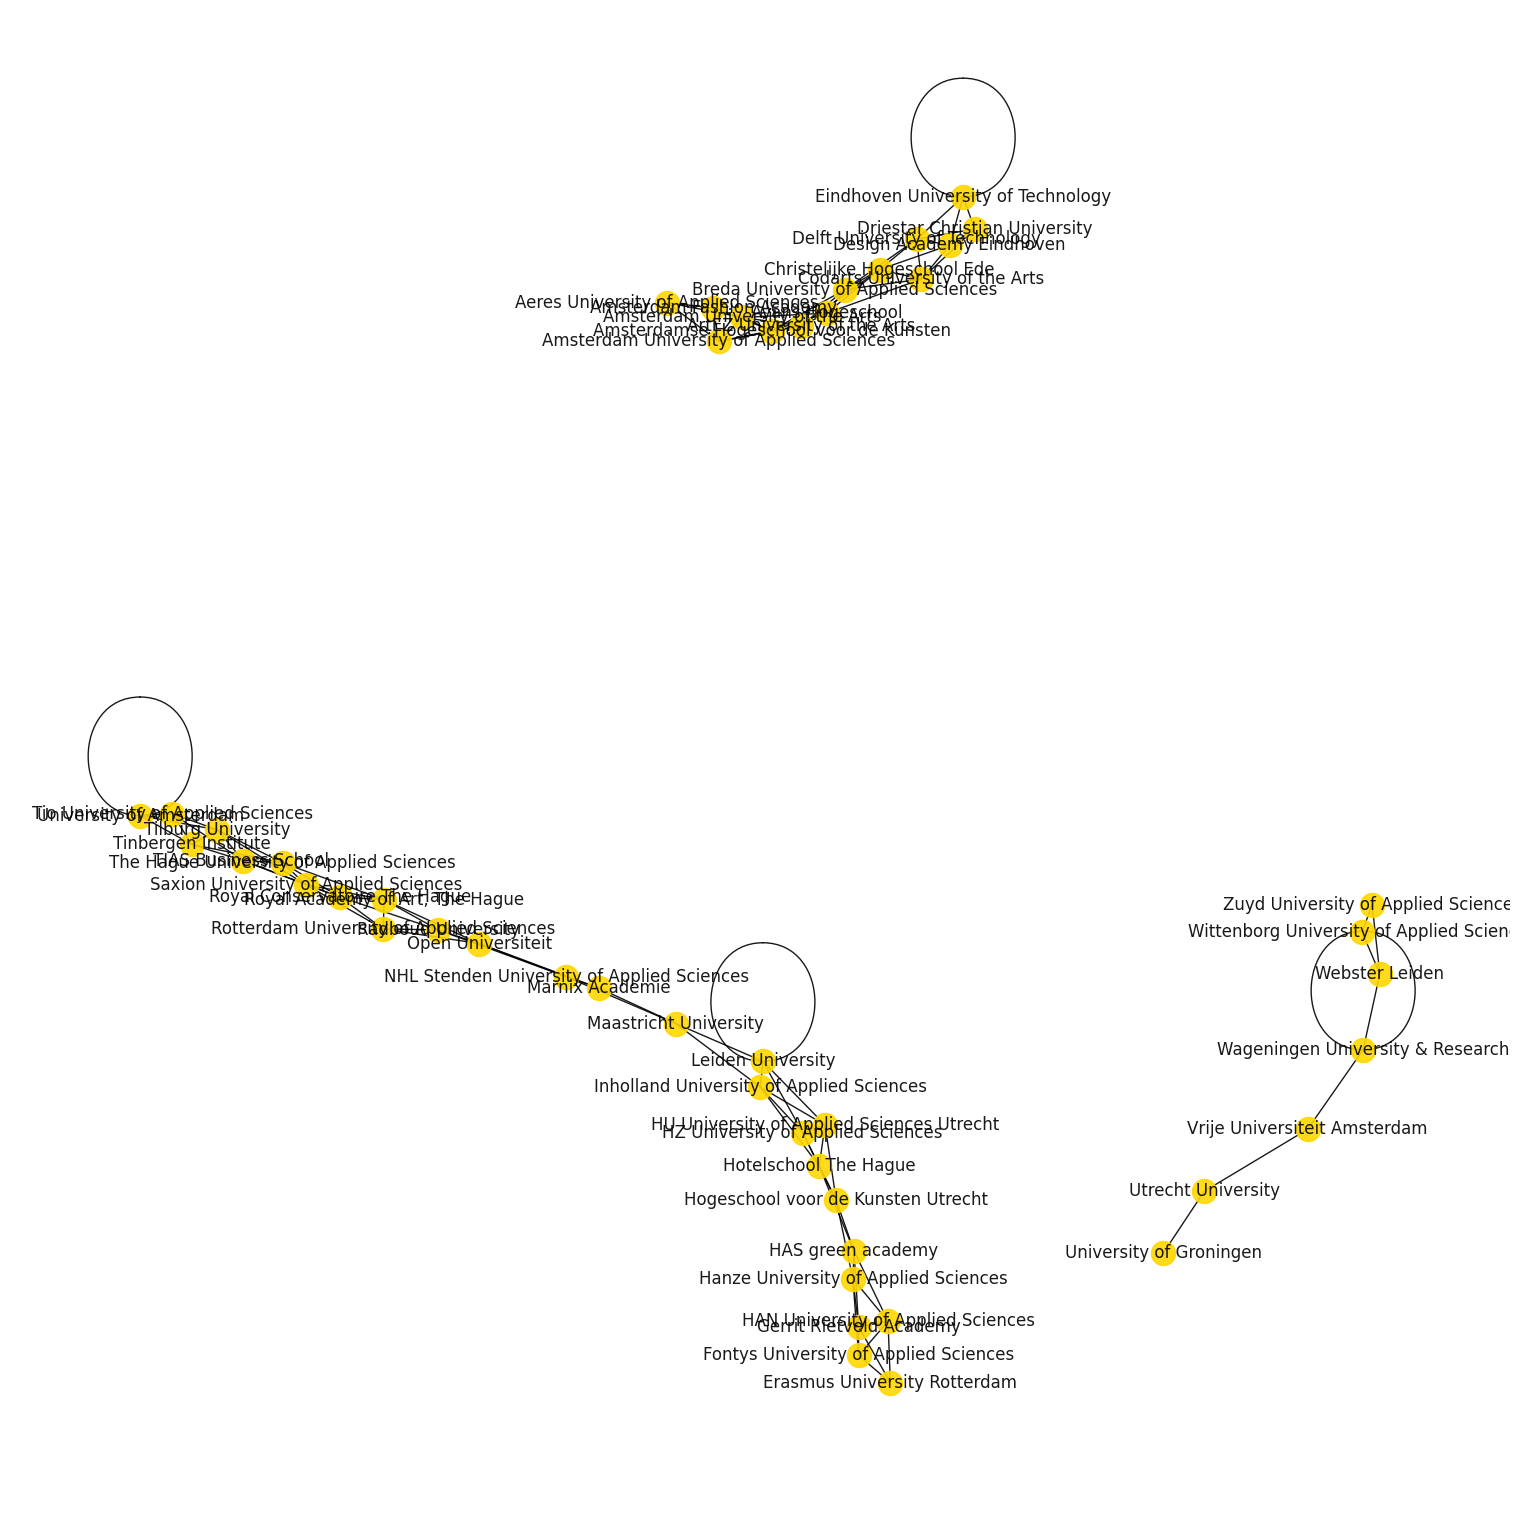

In [78]:
G = nx.Graph()

# Iterate over the rows of the DataFrame and add edges to the graph
for index, row in table.iterrows():
    source = row['university 1']
    target = row['university 2']
    weight = row['distance']
    G.add_edge(source, target, weight=weight)
# show the plot with increased size, bigger nodes, and reduced edge opacity
pos = nx.spring_layout(G, dim=2, iterations=100, weight='weight', scale=5)
node_colors = ["gold"]

plt.figure(figsize=(15, 15))
nx.draw(G, pos, node_color=node_colors, with_labels=True, alpha=0.9)
plt.show()

In [93]:
G = nx.Graph()

nodes = unis
G.add_nodes_from(unis)

for i in range(distance_df.shape[0]):
    from_edge = distance_df.iloc[i]['university 1']
    to_edge = distance_df.iloc[i]['university 2']
    G.add_edge(from_edge, to_edge, tag='test')

# Create a Network instance
nt = Network(notebook=True, cdn_resources='in_line')

# Add nodes and edges with labels and colors
for node in G.nodes():
    nt.add_node(node)  # No need to convert the node ID to a string

for edge in G.edges(data=True):
    source, target, attributes = edge
    tag = attributes['tag']
    nt.add_edge(source, target, label=tag, title=tag)

# Show the graph
nt.show('graph.html')


graph.html


In [95]:
G.edges()

EdgeView([('Aeres University of Applied Sciences', 'Amsterdam Fashion Academy'), ('Aeres University of Applied Sciences', 'Amsterdam University of Applied Sciences'), ('Aeres University of Applied Sciences', 'Amsterdam University of the Arts'), ('Aeres University of Applied Sciences', 'Amsterdamse Hogeschool voor de Kunsten'), ('Aeres University of Applied Sciences', 'ArtEZ University of the Arts'), ('Aeres University of Applied Sciences', 'Avans Hogeschool'), ('Aeres University of Applied Sciences', 'Breda University of Applied Sciences'), ('Aeres University of Applied Sciences', 'Christelijke Hogeschool Ede'), ('Aeres University of Applied Sciences', 'Codarts University of the Arts'), ('Aeres University of Applied Sciences', 'Delft University of Technology'), ('Aeres University of Applied Sciences', 'Design Academy Eindhoven'), ('Aeres University of Applied Sciences', 'Driestar Christian University'), ('Aeres University of Applied Sciences', 'Eindhoven University of Technology'), ('A

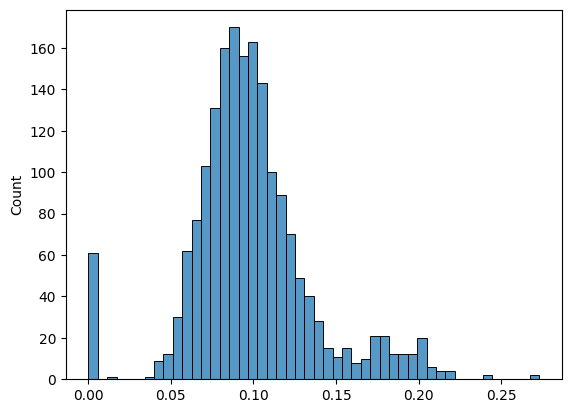

In [36]:
_ = sns.histplot(distances_for_hist)

In [37]:
len(distances_for_hist)

2278

In [38]:
distances_for_hist

[0.0,
 0.094427428540213,
 0.08251831172052405,
 0.06392377444728276,
 0.19255551125915324,
 0.09470302038133771,
 0.08069976027349603,
 0.08642086753463325,
 0.07143210889780557,
 0.06173757831142969,
 0.12141793723490588,
 0.13349663598377623,
 0.08569744970524944,
 0.09379414941512242,
 0.07875632530208854,
 0.05913355131676814,
 0.10482173287475638,
 0.10147209298803166,
 0.07742557950289851,
 0.09166428438552894,
 0.07540374052796428,
 0.08436995975751614,
 0.0844214187752678,
 0.08669412870255111,
 0.11913614898673877,
 0.08512678379387156,
 0.08302576587259552,
 0.12877113184401465,
 0.1133034722886927,
 0.09056493035009516,
 0.08760986809847936,
 0.10607466252162577,
 0.09542976569010825,
 inf,
 0.19255551125915324,
 0.08590395971197237,
 0.1135167889963756,
 0.10131149288133368,
 0.059126426399152075,
 0.09554695825648032,
 0.0834931566402609,
 0.16466533068865002,
 inf,
 0.08244609888342705,
 0.0553531170226444,
 inf,
 0.09121233879678005,
 0.09534618275045015,
 0.05501088724

<Axes: >

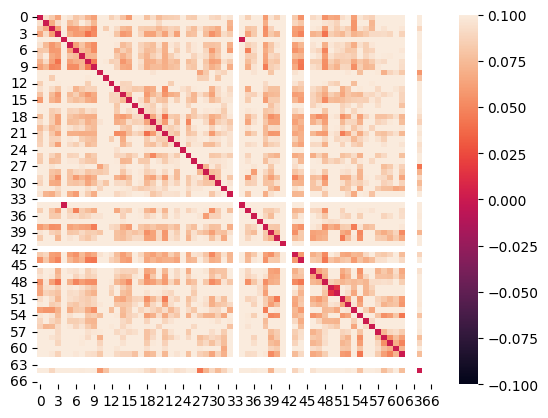

In [14]:
import seaborn as sns
sns.heatmap(distances)

In [ ]:
sns.heatmap()